In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784') #손글씨 데이터: 784(28*28)개의 값이 하나로, =784개의 컬럼값

In [3]:
type(mnist)
type(mnist.data)

pandas.core.frame.DataFrame

In [4]:
mnist.data.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [7]:
mnist.target_names

['class']

In [8]:
mnist.data.iloc[0] #데이터 프레임이라서 iloc해야 나옴
print(mnist.data.iloc[0].tolist())

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 18.0, 18.0, 18.0, 126.0, 136.0, 175.0, 26.0, 166.0, 255.0, 247.0, 127.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 36.0, 94.0, 154.0, 170.0, 253.0, 253.0, 253.0, 253.0, 253.0, 225.0, 172.0, 253.0, 242.0, 195.0,

In [9]:
mnist.data.iloc[0].min(),mnist.data.iloc[0].max()

(0.0, 255.0)

In [10]:
mnist.data.shape

(70000, 784)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(mnist.data,mnist.target,test_size=0.1)

In [13]:
y_train.value_counts()

1    7139
7    6571
3    6418
2    6309
9    6252
0    6233
4    6161
6    6150
8    6112
5    5655
Name: class, dtype: int64

In [14]:
y_test.value_counts()

1    738
6    726
3    723
7    722
8    713
9    706
2    681
0    670
4    663
5    658
Name: class, dtype: int64

In [15]:
#모델 앞 시간에 했던거 가져올거야

In [16]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

In [19]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
accuracy_score(y_test,rf_pred)

0.9702857142857143

In [20]:
lgbm_mapper = LGBMClassifier(n_estimators=400)
evals=[(X_test,y_test)] #평가
lgbm_mapper.fit(X_train,
                y_train,
                early_stopping_rounds=100,
                eval_metric='logloss',
                eval_set=evals,
               verbose=True)
lgbm_pred = lgbm_mapper.predict(X_test)
accuracy_score(y_test,lgbm_pred)

C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 1.69704
[2]	valid_0's multi_logloss: 1.39514
[3]	valid_0's multi_logloss: 1.18649
[4]	valid_0's multi_logloss: 1.02882
[5]	valid_0's multi_logloss: 0.902151
[6]	valid_0's multi_logloss: 0.799543
[7]	valid_0's multi_logloss: 0.714707
[8]	valid_0's multi_logloss: 0.642923
[9]	valid_0's multi_logloss: 0.581724
[10]	valid_0's multi_logloss: 0.530053
[11]	valid_0's multi_logloss: 0.485863
[12]	valid_0's multi_logloss: 0.448063
[13]	valid_0's multi_logloss: 0.41462
[14]	valid_0's multi_logloss: 0.384327
[15]	valid_0's multi_logloss: 0.357601
[16]	valid_0's multi_logloss: 0.334738
[17]	valid_0's multi_logloss: 0.314536
[18]	valid_0's multi_logloss: 0.297234
[19]	valid_0's multi_logloss: 0.280919
[20]	valid_0's multi_logloss: 0.266535
[21]	valid_0's multi_logloss: 0.253454
[22]	valid_0's multi_logloss: 0.241548
[23]	valid_0's multi_logloss: 0.230462
[24]	valid_0's multi_logloss: 0.220661
[25]	valid_0's multi_logloss: 0.211127
[26]	valid_0's multi_logloss: 0.20247
[

0.9804285714285714

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
n_test = len(X_test)
random_pick = np.random.randint(0,n_test,10)
random_pick

array([6912,  281, 1982, 6865, 3837, 1154, 5764, 1354, 5559,  807])

['3', '7', '2', '7', '8', '2', '9', '1', '7', '2']


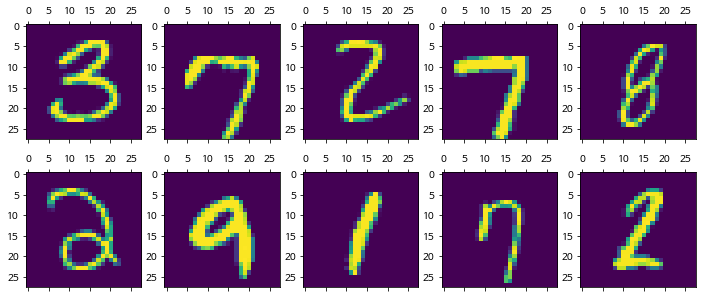

In [26]:
random_pick = np.random.randint(0,n_test,10)

fig = plt.figure(figsize=(12,5))
axes = []
for i in range(1,11):
    axes.append(fig.add_subplot(2,5,i))
    
tmp_list = []
for i in range(10):
    tmp = X_test.iloc[random_pick[i]]
    tmp = tmp.values.reshape(28,28)
    tmp_list.append(tmp)
    
print(y_test.iloc[random_pick].tolist())

for i in range(10):
    axes[i].matshow(tmp_list[i])

In [28]:
import glob
from PIL import Image

./data\0.png
['7'] ['5']


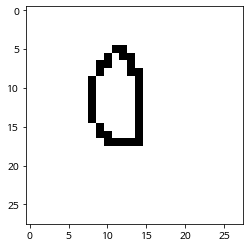

./data\1.png
['1'] ['5']


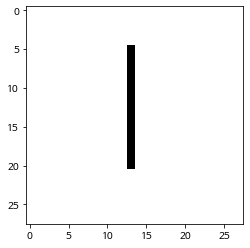

./data\2.png
['7'] ['5']


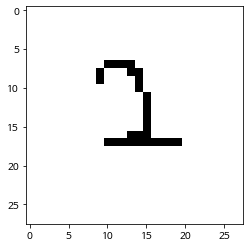

./data\3.png
['7'] ['5']


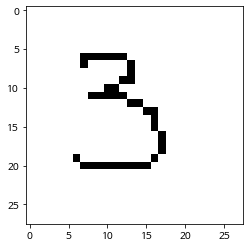

./data\4.png
['7'] ['1']


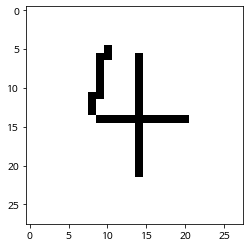

./data\5.png
['7'] ['1']


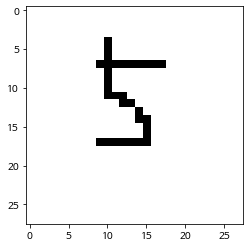

./data\6.png
['7'] ['2']


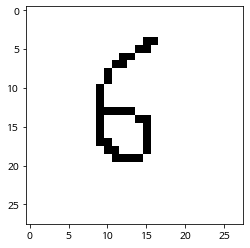

./data\7.png
['5'] ['5']


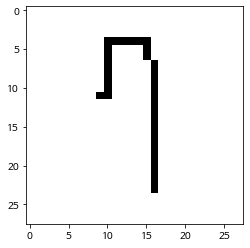

./data\8.png
['1'] ['7']


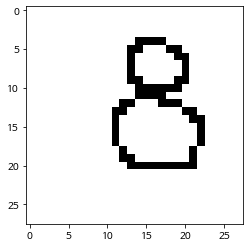

./data\9.png
['5'] ['5']


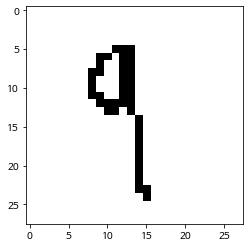

In [34]:
for path in glob.glob('./data/*.png'):
    print(path) #경로가 올바른지 파일 확인
    img = Image.open(path)
    plt.imshow(img)
    img = np.resize(img,(1,784)) #숫자값으로 확인
    img = 255 - (img)
    pred1 = rf_clf.predict(img)
    pred2 = lgbm_mapper.predict(img)
    print(pred1,pred2)
    plt.show() #그림 맞는지 확인
    # print(img)

In [35]:
import pickle

In [37]:
f = open('model1.pickle','wb')
pickle.dump(rf_clf,f)

In [39]:
f = open('model2.pickle','wb')
pickle.dump(lgbm_mapper,f)

In [40]:
#이 프로그램을 웹으로 > github

In [ ]:
#위 파일경로가 잘못 설정되었을 때 vscode에러나면 다시 이거 실행해서 할 것
# f = open('model1.pickle','rb')
# model = pickle.load(f)
# model.predict(X_test)